In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('Train.csv')

In [52]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [27]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [29]:
df.shape

(10999, 12)

In [54]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

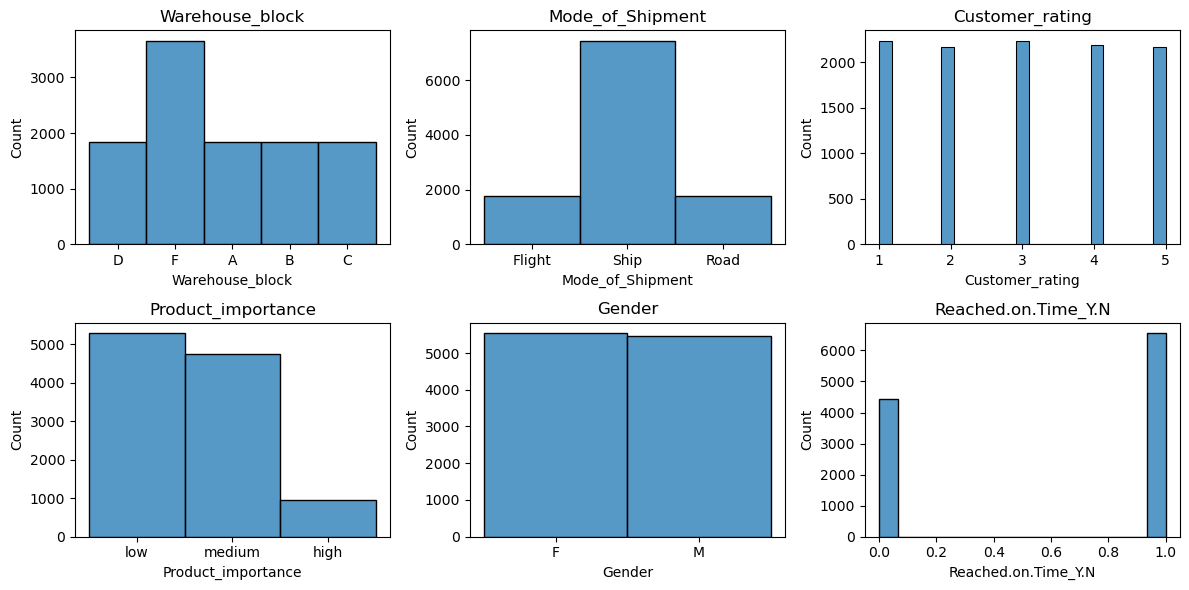

In [68]:
fig, axes = plt.subplots(2, 3, figsize=(12, 6))  
axes = axes.flatten()                              

columns = ['Warehouse_block','Mode_of_Shipment','Customer_rating','Product_importance', 'Gender','Reached.on.Time_Y.N']

for i, col in enumerate(columns):
    sns.histplot(df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


# ***Univariate Insights***

1. Warehouse F handles the highest number of orders, making it the busiest block.

2. Most products are shipped by Ship, indicating that it’s the primary transportation mode.

3. Low product importance dominates the dataset, showing that most items are routine/low-priority products.

4. Late deliveries (1) are higher than on-time deliveries (0), which is a major operational issue.

5. Male and female customers are almost equal, with females slightly higher by around 1%.

In [5]:
object_columns = df.select_dtypes(include = ['object'])
object_columns.head()
                        

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F


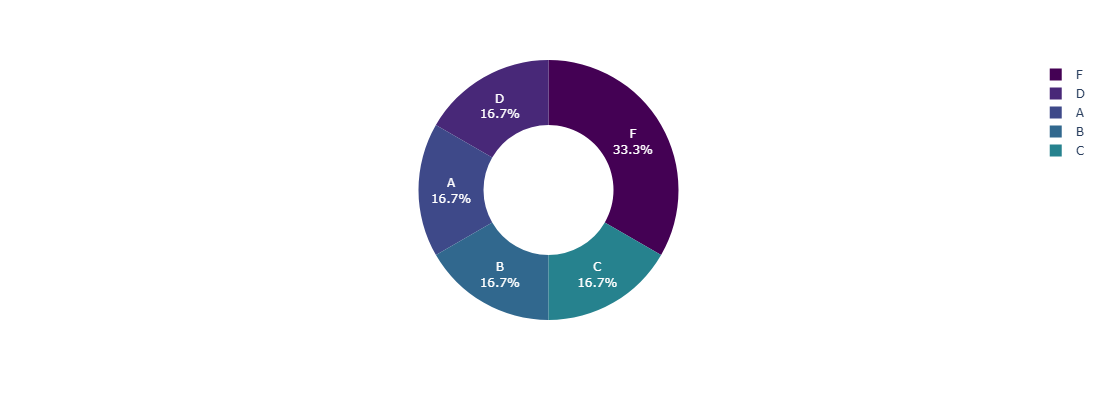

In [70]:
warehouse = object_columns['Warehouse_block'].value_counts().reset_index()
warehouse.columns = ['Warehouse','value_counts']
fig=px.pie(warehouse, names = 'Warehouse', values = 'value_counts',color_discrete_sequence = px.colors.sequential.Viridis,hole = 0.5,width = 850, height =  400)
fig.update_traces(textinfo = 'percent+label')
fig

<Axes: xlabel='Warehouse_block', ylabel='count'>

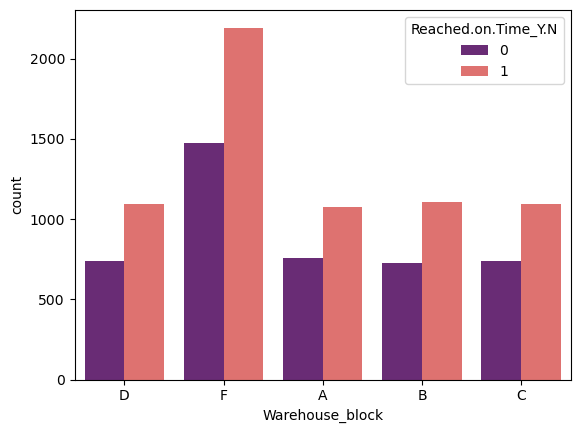

In [7]:
sns.countplot(data = df, x = 'Warehouse_block', hue = 'Reached.on.Time_Y.N', palette = 'magma')

Warehouse F shows highest number of late deliveries compared to remaining blocks. where remaining blocks has fewer late deliveries, indicating warehouse F has possible operational or load-handling issues.

In [8]:
shipment = object_columns['Mode_of_Shipment'].value_counts().reset_index()
shipment.columns = ['shipments', 'value_counts']
fig = px.pie(shipment, names = 'shipments',values = 'value_counts',color_discrete_sequence = px.colors.sequential.Viridis,width = 850, height = 400,hole = 0.5)

shipment
fig.update_traces(textinfo = 'percent+label')
fig

<Axes: xlabel='Mode_of_Shipment', ylabel='count'>

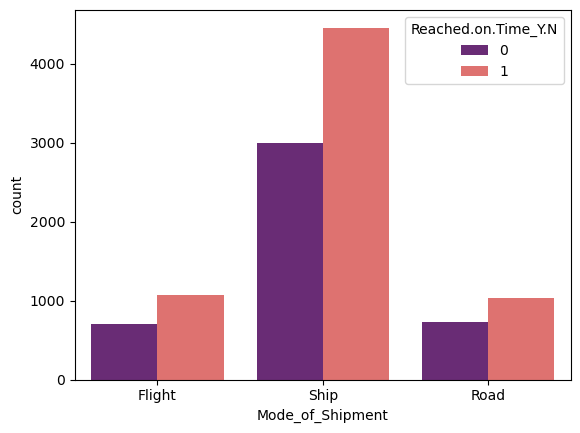

In [9]:
sns.countplot(data = df, x = 'Mode_of_Shipment', hue = 'Reached.on.Time_Y.N', palette = 'magma')

Shiiping by ship is the major contributor to late deliveries, where flight and road are more efficient delivery mode

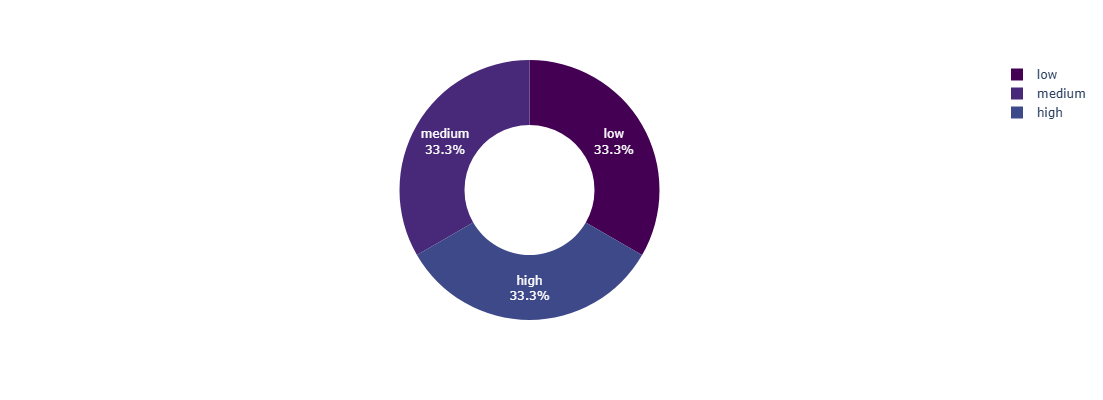

In [71]:
product_imp = object_columns['Product_importance'].value_counts().reset_index()
product_imp.columns = ['Product_importance','value_counts']
fig = px.pie(product_imp,names = 'Product_importance',color_discrete_sequence = px.colors.sequential.Viridis, height = 400, width = 850, hole = 0.5)
fig.update_traces(textinfo = 'percent+label') 

<Axes: xlabel='Product_importance', ylabel='count'>

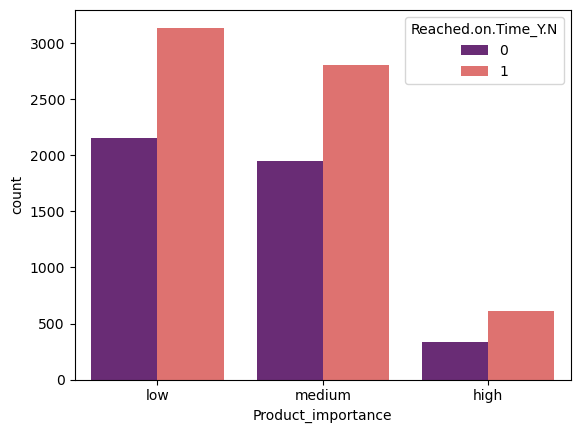

In [20]:
sns.countplot(data = df, x = 'Product_importance', hue = 'Reached.on.Time_Y.N', palette = 'magma')

Low and medium importance products have high order volume and large number of late deliveries, where as highest priority products have fewer late delays leads to better priority handling.

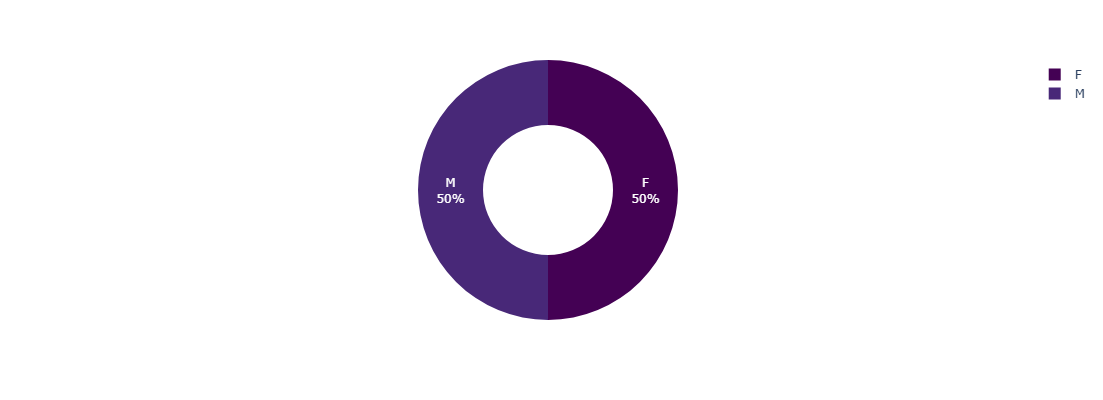

In [28]:
genders = object_columns['Gender'].value_counts().reset_index()
genders.columns = ['Gender','value_counts']
fig = px.pie(genders, names = 'Gender', color_discrete_sequence = px.colors.sequential.Viridis, width = 850, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

<Axes: xlabel='Gender', ylabel='count'>

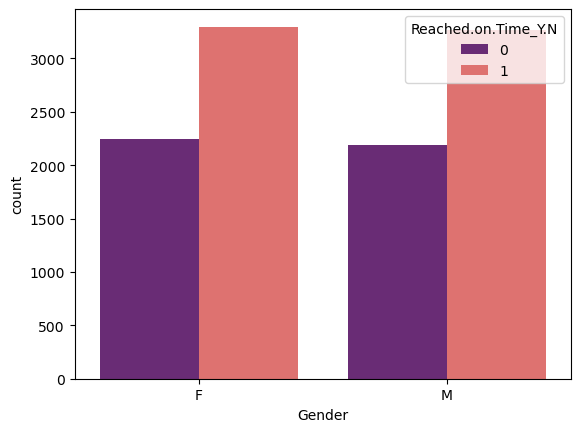

In [29]:
sns.countplot(data = df, x = 'Gender' ,hue = 'Reached.on.Time_Y.N', palette = 'magma')

In [31]:
integer_columns = df.select_dtypes(include = ['int64'])
integer_columns.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,4,2,177,3,44,1233,1
1,2,4,5,216,2,59,3088,1
2,3,2,2,183,4,48,3374,1
3,4,3,3,176,4,10,1177,1
4,5,2,2,184,3,46,2484,1


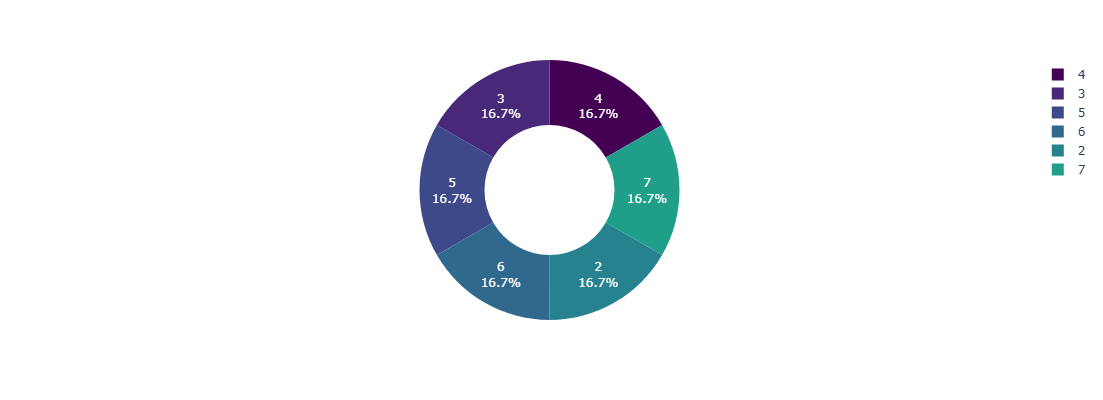

In [42]:
customer_care = integer_columns['Customer_care_calls'].value_counts().reset_index()
customer_care.columns = ['Customer_care_calls','value_counts']
fig = px.pie(customer_care,names = 'Customer_care_calls',color_discrete_sequence = px.colors.sequential.Viridis , width = 850, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')
fig

<Axes: xlabel='Customer_care_calls', ylabel='count'>

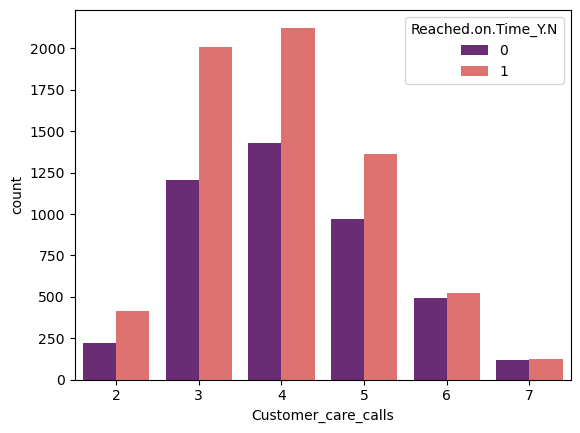

In [44]:
sns.countplot( data = df, x = 'Customer_care_calls', hue = 'Reached.on.Time_Y.N', palette = 'magma')

More customer care calls are strongly associated with delivery delays, meaning customers are contacting support because their orders are not arriving on time.
Most delays trigger 3–4 customer calls, but the numbers drop after that because only a small number of customers reach 6–7 calls.

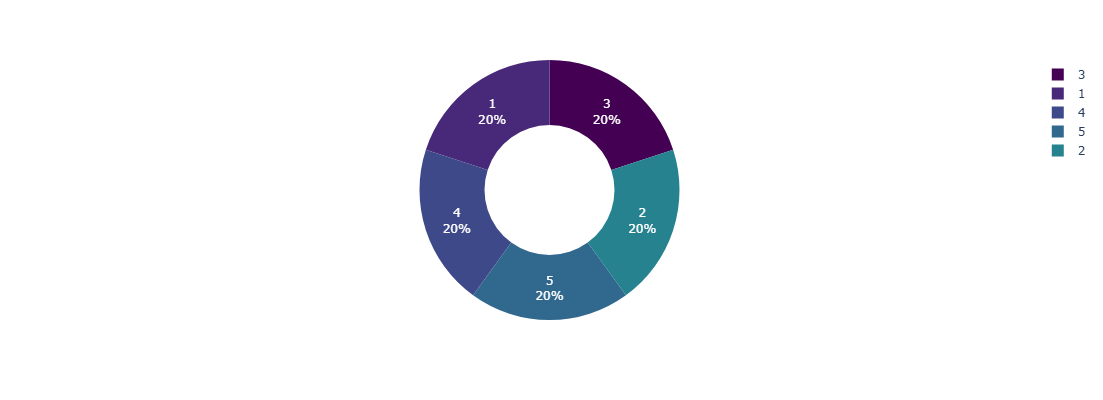

In [45]:
Rating = integer_columns['Customer_rating'].value_counts().reset_index()
Rating.columns = ['Customer_rating','value_counts']
fig = px.pie(Rating,names = 'Customer_rating',color_discrete_sequence = px.colors.sequential.Viridis , width = 850, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')
fig

<Axes: xlabel='Customer_rating', ylabel='count'>

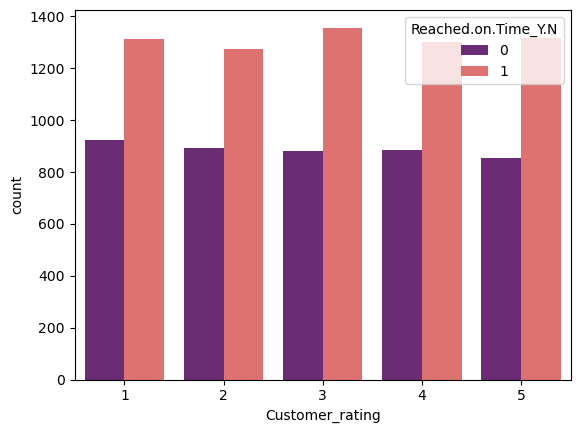

In [48]:
sns.countplot( data = df, x = 'Customer_rating', hue = 'Reached.on.Time_Y.N', palette = 'magma')

Delivery delays do not significantly affect customer ratings in this dataset.

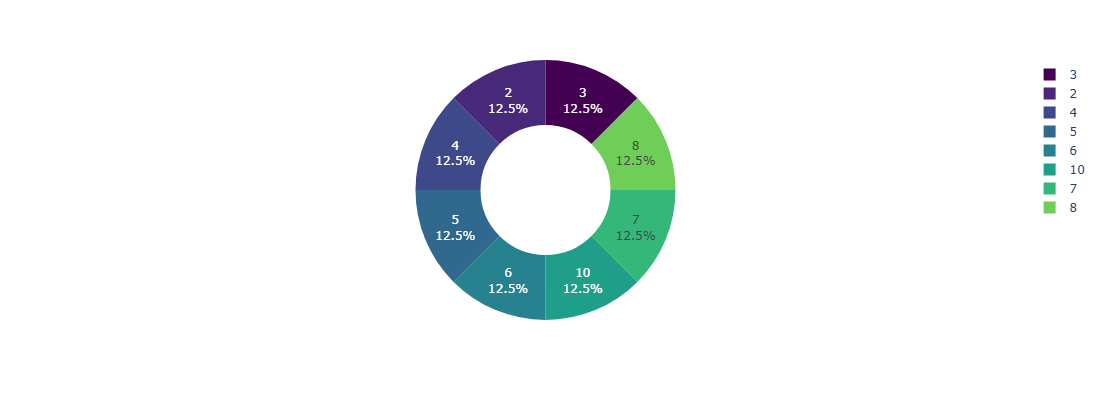

In [47]:
previous_purchases = integer_columns['Prior_purchases'].value_counts().reset_index()
previous_purchases.columns = ['Prior_purchases','value_counts']
fig = px.pie(previous_purchases,names = 'Prior_purchases',color_discrete_sequence = px.colors.sequential.Viridis , width = 850, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')
fig

<Axes: xlabel='Prior_purchases', ylabel='count'>

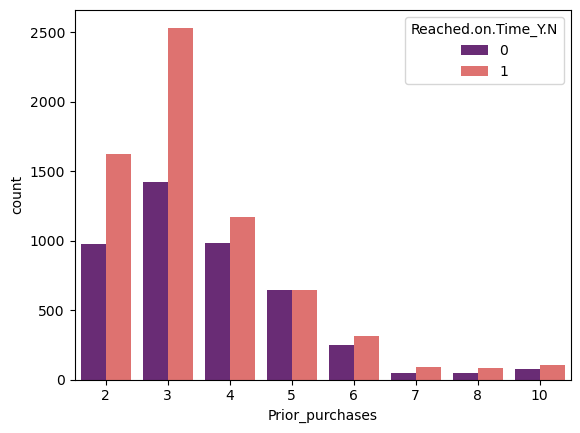

In [49]:
sns.countplot( data = df, x = 'Prior_purchases', hue = 'Reached.on.Time_Y.N', palette = 'magma')

Delivery performance is not influenced by how many times a customer purchased earlier — delays happen similarly across all customer groups.

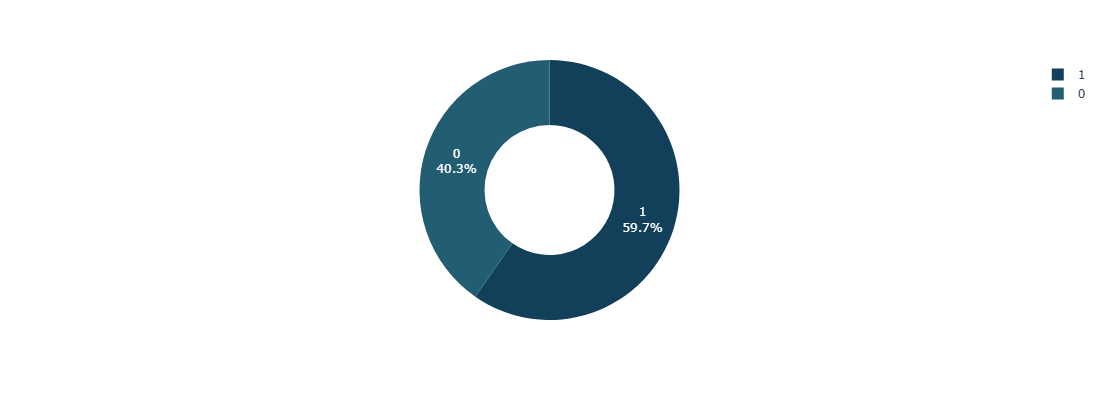

In [50]:
reached_on_time_y_n = integer_columns['Reached.on.Time_Y.N'].value_counts().reset_index()
reached_on_time_y_n.columns = ['Reached.on.Time_Y.N', 'value_counts']
fig = px.pie(reached_on_time_y_n, names = 'Reached.on.Time_Y.N', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.Darkmint_r, width = 650, height = 400,
            hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

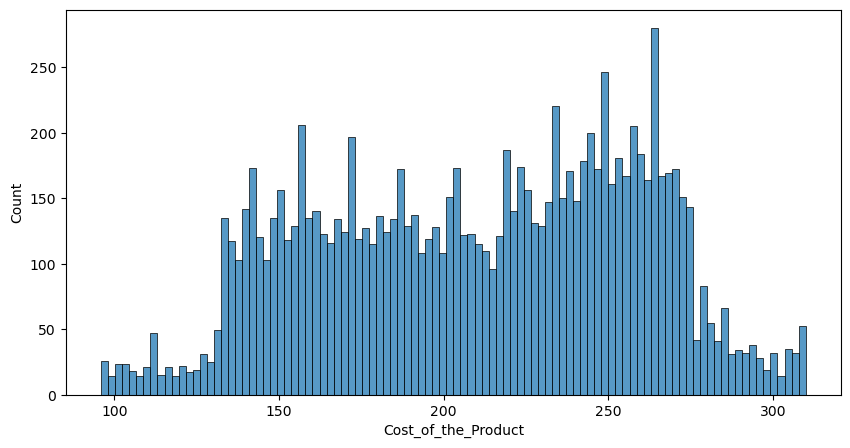

In [73]:
plt.figure(figsize = (10, 5))
ax = sns.histplot(df['Cost_of_the_Product'], bins = 100)

plt.show()

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='Cost_of_the_Product'>

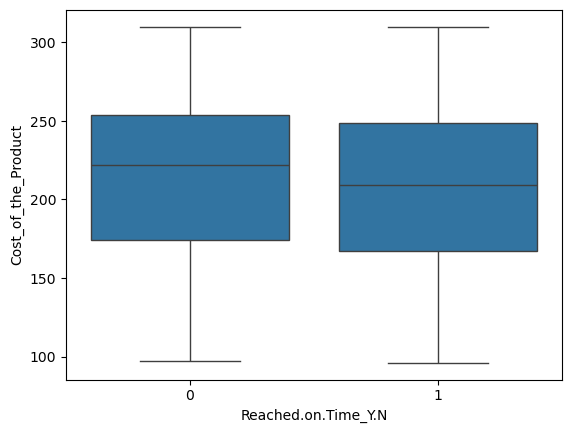

In [65]:
sns.boxplot(data = df, y = 'Cost_of_the_Product', x = 'Reached.on.Time_Y.N' )

Expensive and cheap products are delivered with the same delay pattern — cost has no influence on whether an order is late or on time.

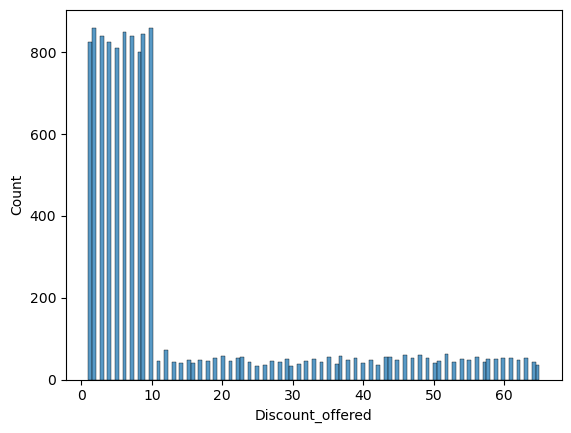

In [74]:
ax = sns.histplot(df['Discount_offered'])

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='Discount_offered'>

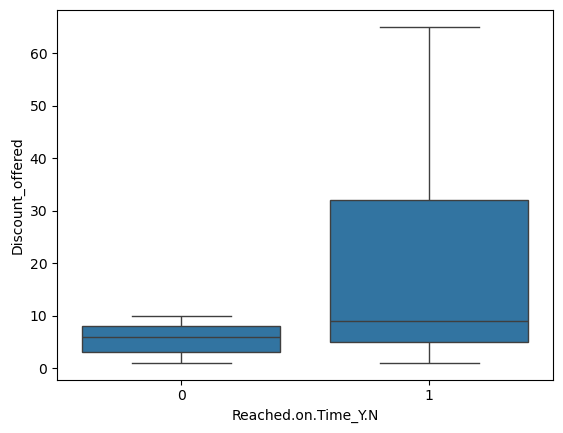

In [67]:
sns.boxplot(data = df, x = 'Reached.on.Time_Y.N', y = 'Discount_offered')

Higher discounts are associated with more late deliveries.
Orders with big discounts are more likely to be delayed.

# ***Conclusion***

The analysis clearly shows that delivery performance depends mainly on warehouse efficiency, shipping mode, and order characteristics such as discounts and product priority. Improving operations at Warehouse F, optimizing Ship-mode logistics, and preparing better for high-discount periods such as festival sales, End-of-season sales can significantly reduce delays and improve customer experience.